# 4. Model Evaluation & Comparison
---
This notebook loads the trained models and compares their performance using evaluation metrics and visualizations.

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [22]:
# Load test data and model names
X_test, y_test = joblib.load('test_data.pkl')
model_names = ['Linear_Regression', 'Random_Forest', 'XGBoost']

# Impute missing values in X_test
imputer = SimpleImputer(strategy='mean')
X_test = imputer.fit_transform(X_test)

In [23]:
# Evaluate models and store results
results = []
for name in model_names:
    model = joblib.load(f'{name}.pkl')
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds)) 
    r2 = r2_score(y_test, preds)
    results.append({'Model': name.replace('_', ' '), 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(results)
results_df

,Model,RMSE,R2 Score
0,Linear Regression,70031.166205,0.625738
1,Random Forest,48993.666429,0.816822
2,XGBoost,47231.945944,0.829759


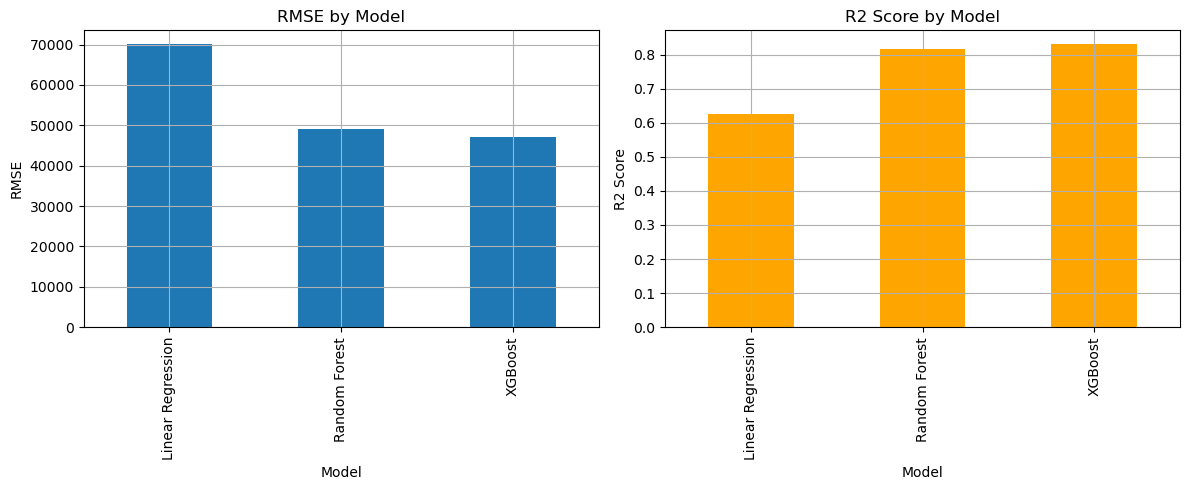

In [24]:
# Plot RMSE and R2 Score for each model
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
results_df.plot(x='Model', y='RMSE', kind='bar', ax=ax[0], legend=False)
ax[0].set_title('RMSE by Model')
ax[0].set_ylabel('RMSE')
ax[0].grid(True)

results_df.plot(x='Model', y='R2 Score', kind='bar', ax=ax[1], legend=False, color='orange')
ax[1].set_title('R2 Score by Model')
ax[1].set_ylabel('R2 Score')
ax[1].grid(True)

plt.tight_layout()
plt.show()